In [1]:
#Reference:  Crop Yield Prediction: https://www.kaggle.com/code/vishal2291/crop-yield-prediction-based-on-rainfall-data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/prince/Downloads/rainfall in india 1901-2015.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [5]:
df.isna().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4090 non-null   object 
 1   YEAR         4090 non-null   int64  
 2   JAN          4090 non-null   float64
 3   FEB          4090 non-null   float64
 4   MAR          4090 non-null   float64
 5   APR          4090 non-null   float64
 6   MAY          4090 non-null   float64
 7   JUN          4090 non-null   float64
 8   JUL          4090 non-null   float64
 9   AUG          4090 non-null   float64
 10  SEP          4090 non-null   float64
 11  OCT          4090 non-null   float64
 12  NOV          4090 non-null   float64
 13  DEC          4090 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4090 non-null   float64
 16  Mar-May      4090 non-null   float64
 17  Jun-Sep      4090 non-null   float64
 18  Oct-Dec      4090 non-null   float64
dtypes: flo

In [11]:
df.describe()

YEAR          JAN          FEB          MAR          APR  \
count  4090.000000  4090.000000  4090.000000  4090.000000  4090.000000   
mean   1958.321271    18.818484    21.644792    27.252494    42.714548   
std      33.148944    33.521719    35.762010    46.829179    67.264863   
min    1901.000000     0.000000     0.000000     0.000000     0.000000   
25%    1930.000000     0.600000     0.600000     1.000000     3.000000   
50%    1959.000000     5.900000     6.600000     7.800000    15.500000   
75%    1987.000000    21.950000    26.600000    31.100000    49.375000   
max    2015.000000   583.700000   403.500000   605.600000   595.100000   

               MAY          JUN          JUL          AUG          SEP  \
count  4090.000000  4090.000000  4090.000000  4090.000000  4090.000000   
mean     84.868044   228.928020   346.496968   289.897506   197.003056   
std     122.556801   233.535693   269.352685   187.702293   135.266708   
min       0.000000     0.400000     0.000000     0.000000     0.100000   
25%       8.500000    70.000000   175.225000   155.925000   100.400000   
50%      36.050000   138.450000   284.300000   259.500000   173.600000   
75%      94.975000   302.250000   416.700000   377.775000   265.600000   
max    1168.600000  1609.900000  2362.800000  1664.600000  1222.000000   

               OCT          NOV          DEC       ANNUAL      Jan-Feb  \
count  4090.000000  4090.000000  4090.000000  4090.000000  4090.000000   
mean     95.139022    39.548191    18.695575  1411.008900    40.462861   
std      99.325638    68.275513    42.185553   903.846565    59.136229   
min       0.000000     0.000000     0.000000    62.300000     0.000000   
25%      14.600000     0.700000     0.100000   804.500000     4.100000   
50%      64.650000     9.500000     3.000000  1121.300000    19.000000   
75%     148.100000    45.475000    17.300000  1644.775000    50.200000   
max     948.300000   648.900000   617.500000  6331.100000   699.500000   

           Mar-May      Jun-Sep      Oct-Dec  
count  4090.000000  4090.000000  4090.000000  
mean    154.835452  1062.325575   153.384499  
std     200.315769   705.970202   166.414108  
min       0.000000    57.400000     0.000000  
25%      23.800000   573.275000    34.025000  
50%      74.250000   880.200000    97.550000  
75%     195.300000  1286.175000   211.800000  
max    1745.800000  4536.900000  1252.500000

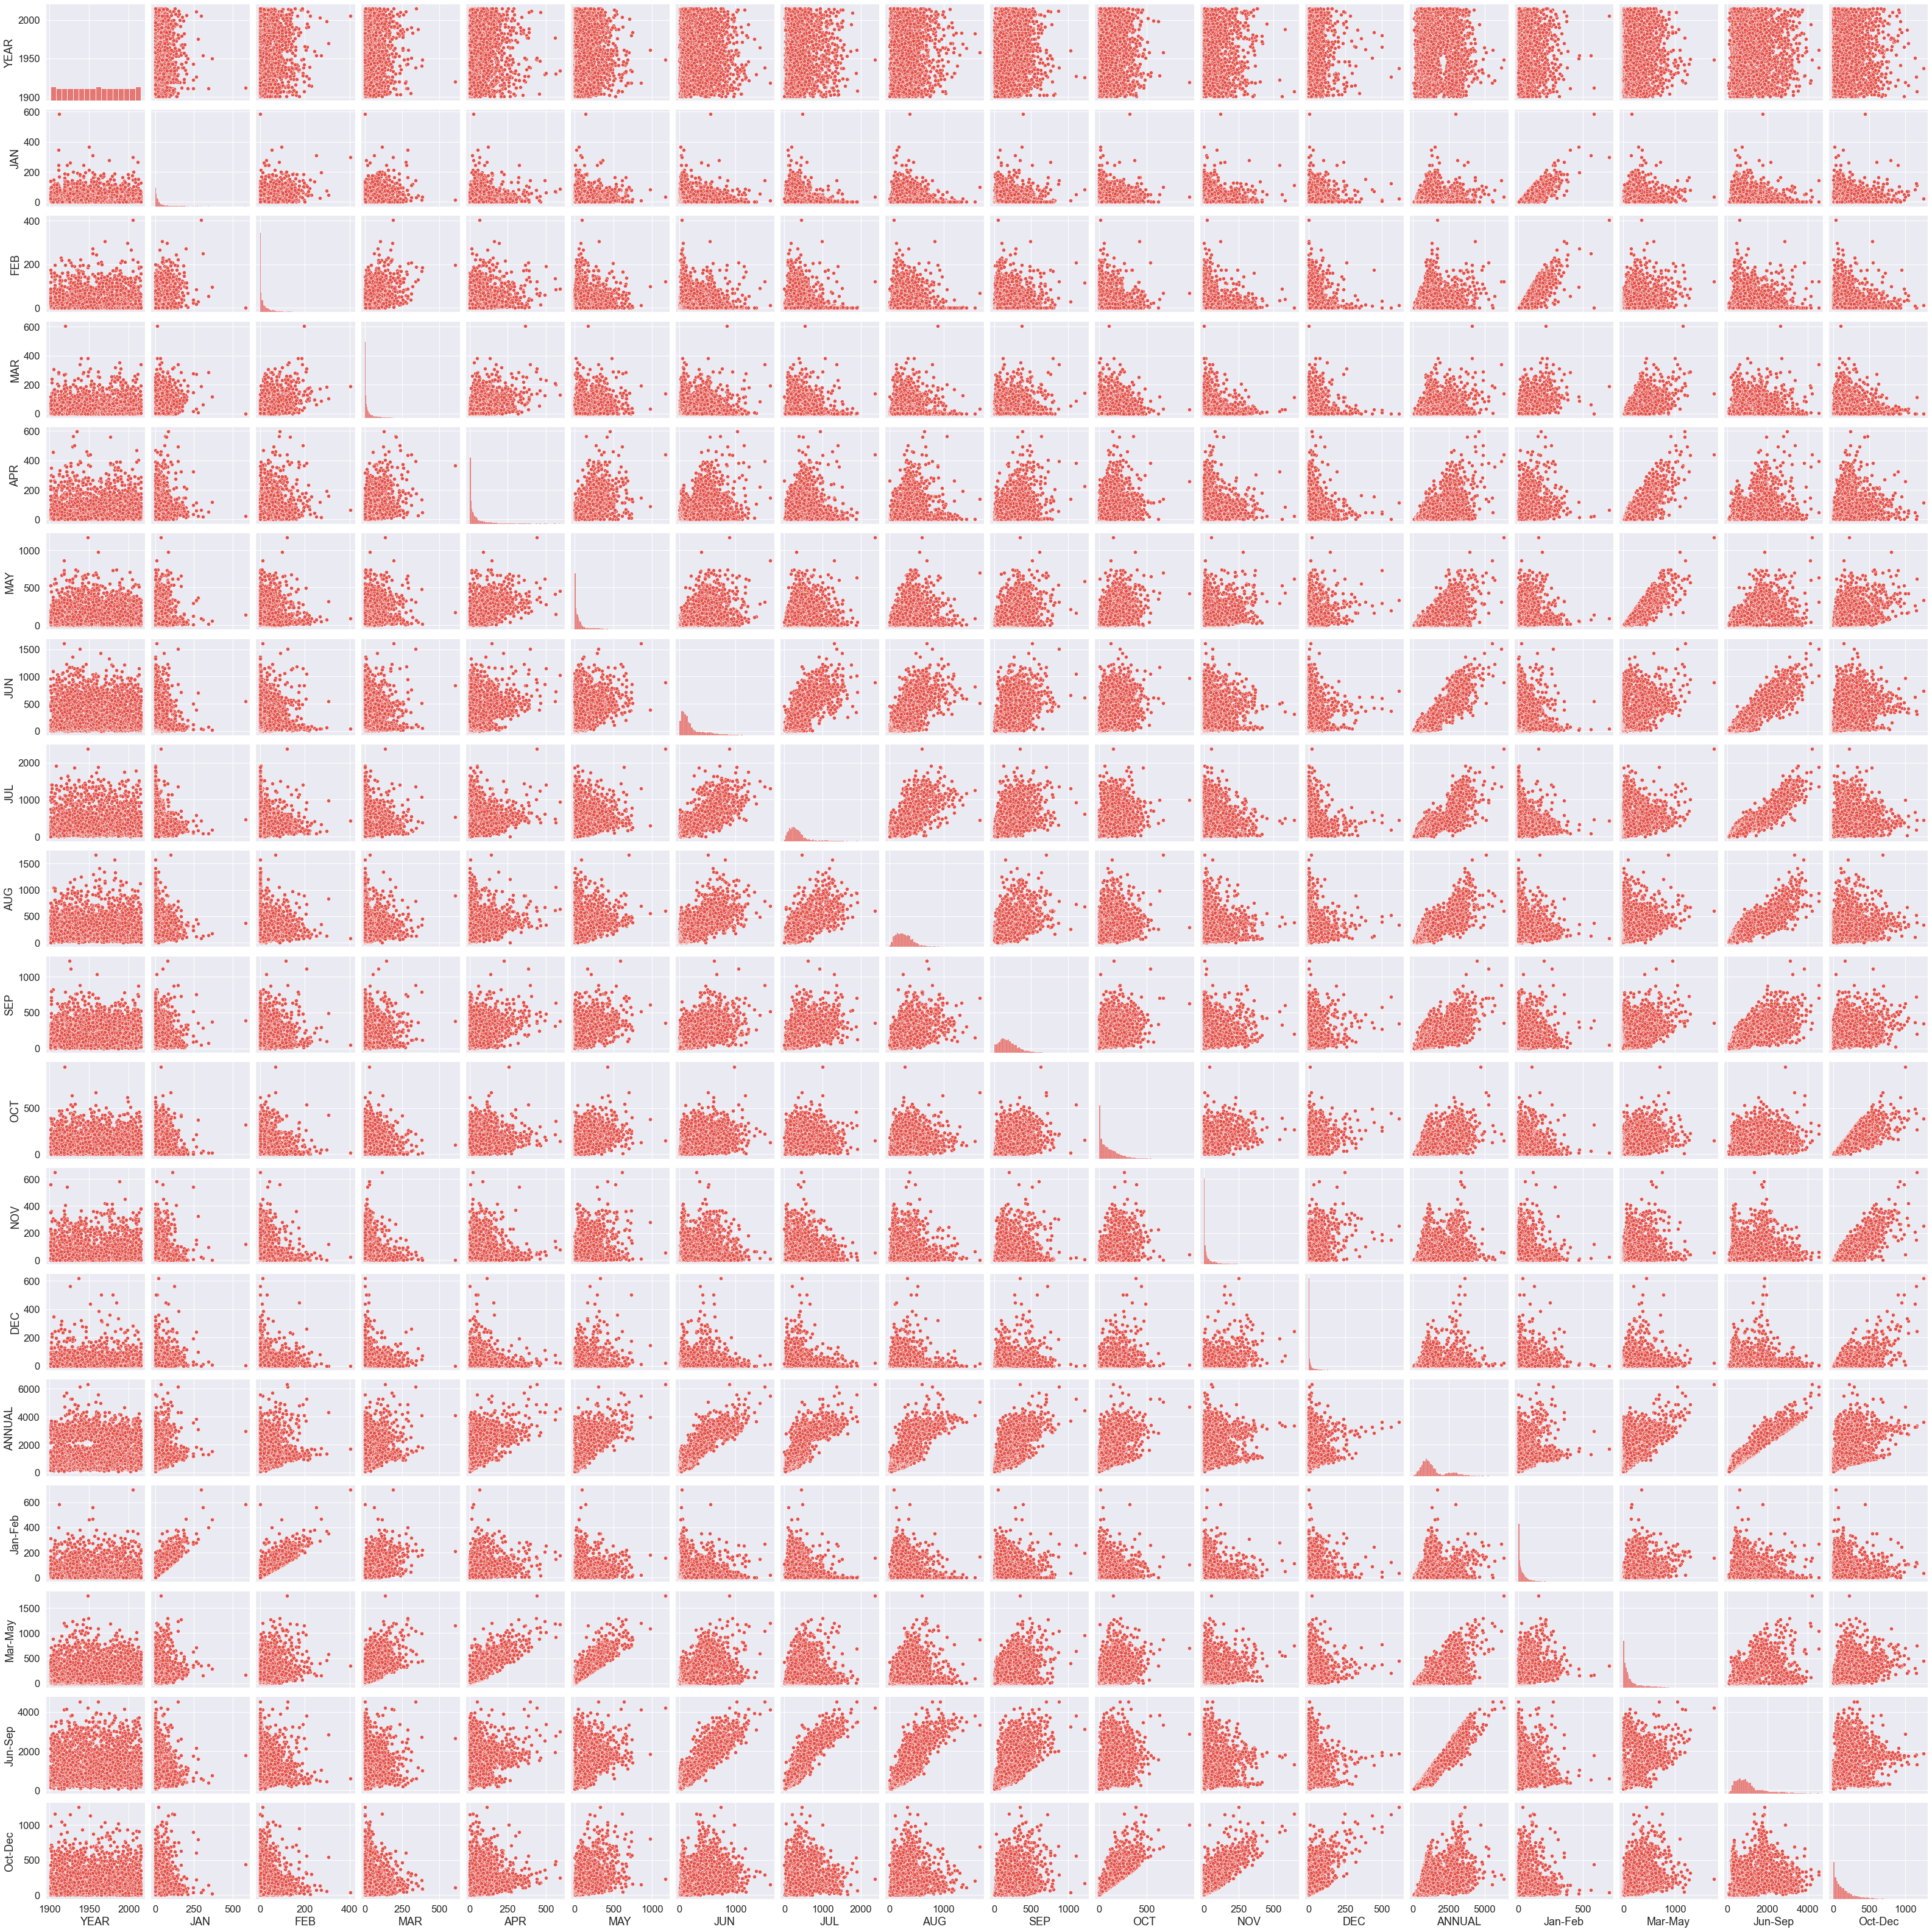

In [12]:
g = sns.pairplot(df)

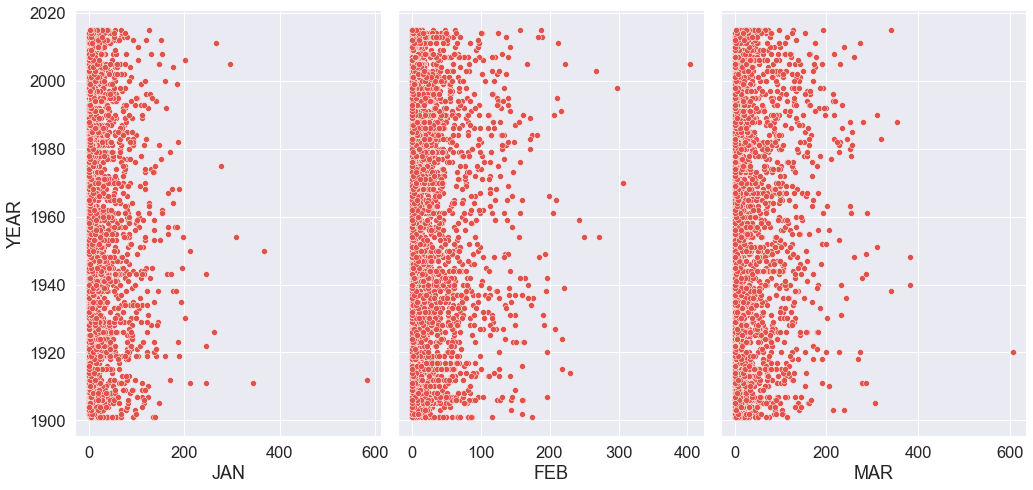

In [14]:
g = sns.pairplot(df, x_vars=['JAN','FEB','MAR'], y_vars='YEAR', size=7, aspect=0.7)

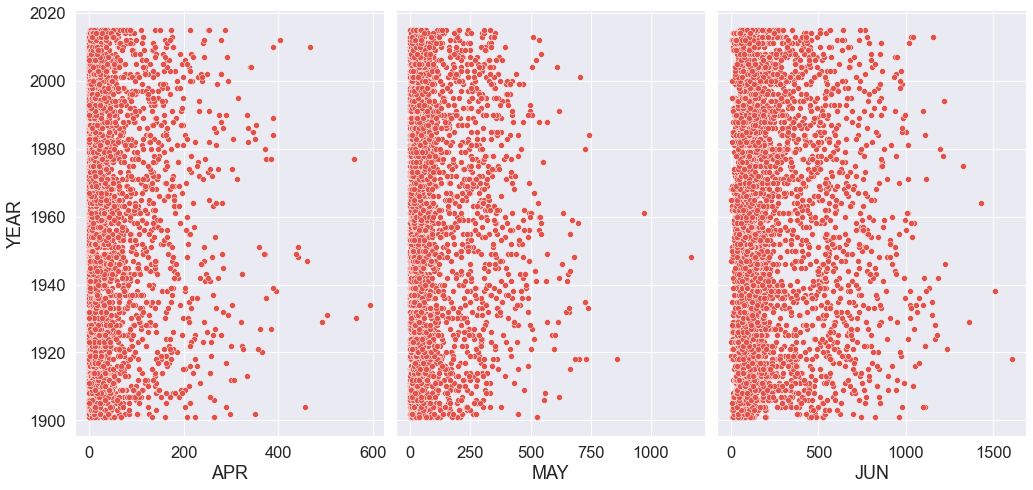

In [15]:
g = sns.pairplot(df, x_vars=['APR','MAY','JUN'], y_vars='YEAR', size=7, aspect=0.7)

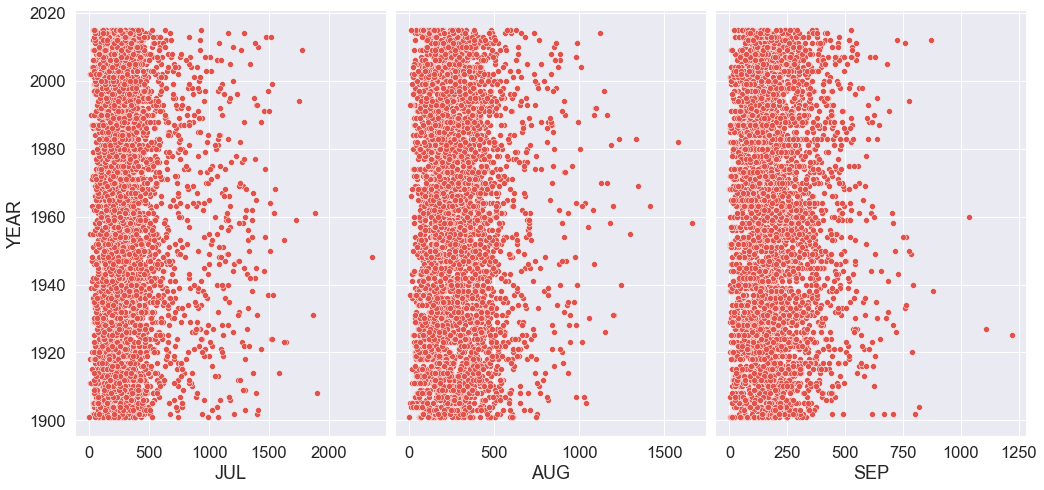

In [16]:
g = sns.pairplot(df, x_vars=['JUL','AUG','SEP'], y_vars='YEAR', size=7, aspect=0.7)

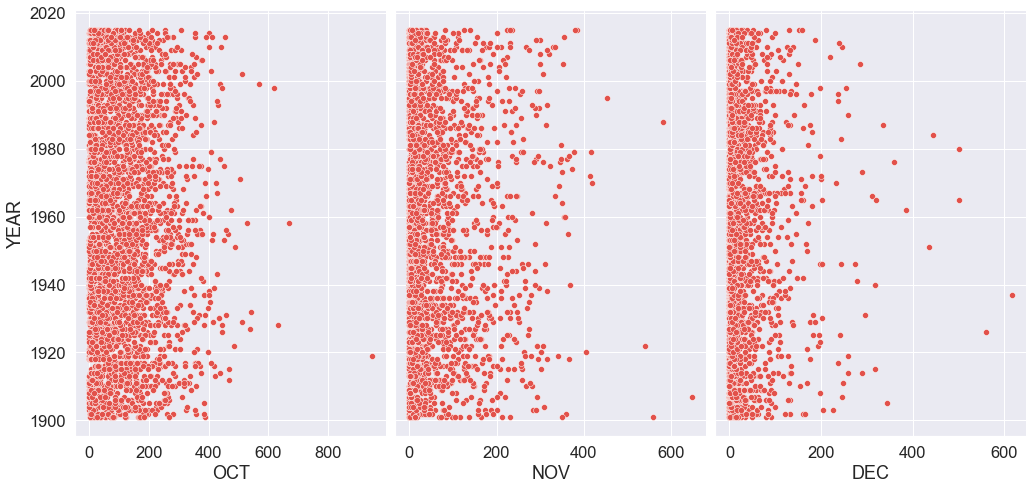

In [17]:
g = sns.pairplot(df, x_vars=['OCT','NOV','DEC'], y_vars='YEAR', size=7, aspect=0.7)

In [30]:
x = df.drop(["SUBDIVISION"],axis=1)
y = df.YEAR

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [34]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 1.0


In [35]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 2.149930416646146e-15


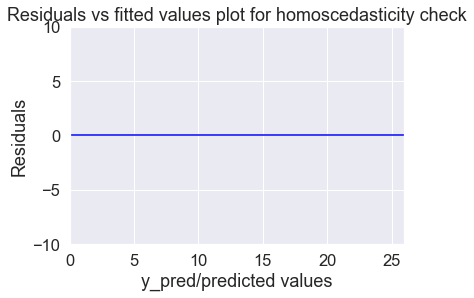

In [36]:
g = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
g = sns.lineplot([0,26],[0,0],color='blue')
g = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [37]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9978913233676009), ('p-value', 0.5163822185675695)]

In [38]:
from scipy.stats import bartlett
test = bartlett(X_train[0],residuals)
print(test)

BartlettResult(statistic=155842.36054777147, pvalue=0.0)


In [39]:
from scipy.stats import bartlett
test = bartlett(X_train[1],residuals)
print(test)

BartlettResult(statistic=164452.95058920083, pvalue=0.0)


In [40]:
from scipy.stats import bartlett
test = bartlett(X_train[2],residuals)
print(test)

BartlettResult(statistic=166558.6394190699, pvalue=0.0)


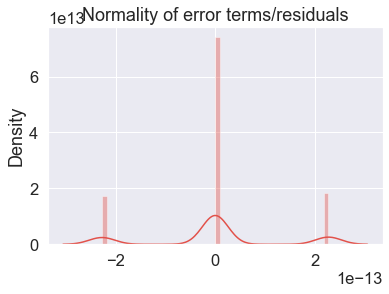

In [41]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

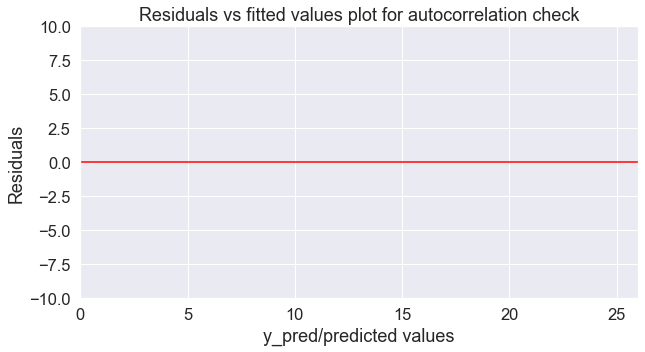

In [42]:
plt.figure(figsize=(10,5))
g = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
g = sns.lineplot([0,26],[0,0],color='red')
g = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [44]:
import statsmodels.api as sm

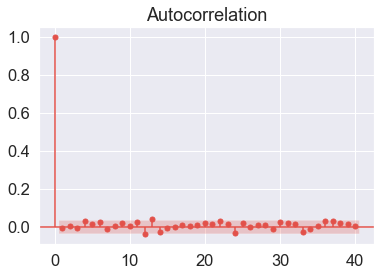

In [45]:
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

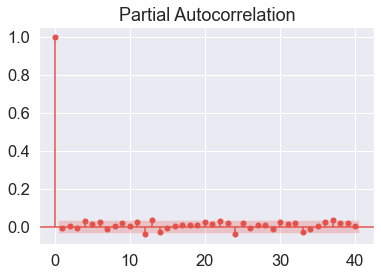

In [46]:
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

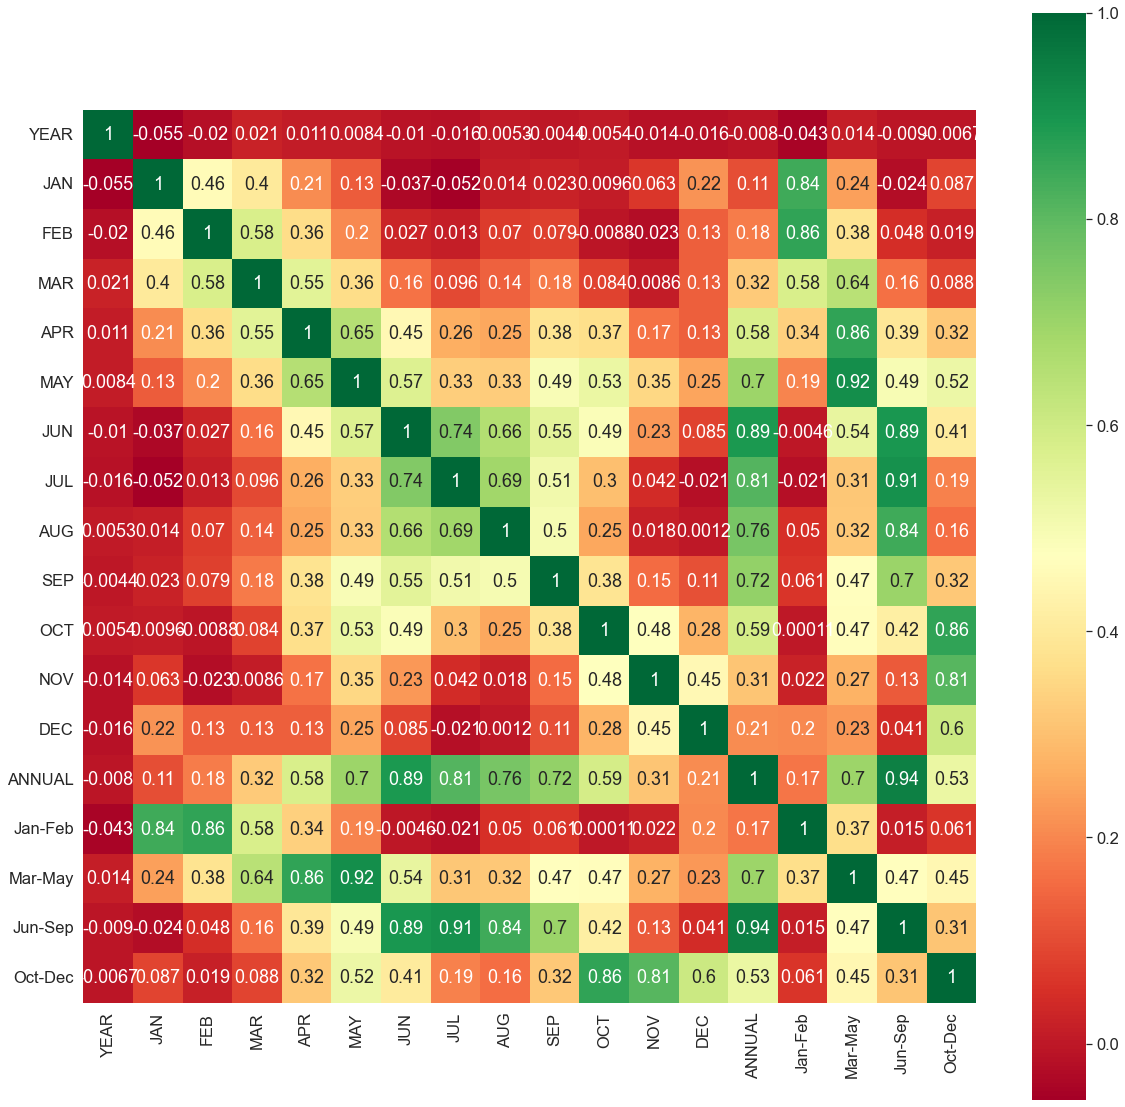

In [48]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
g=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap



In [49]:
## Some other model evaluations

In [50]:
## Decision Tree

from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

Accuracy: 1.0
R squared: 1.0


In [51]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.999999999553019
R squared: 0.999999999553019
